In [ ]:
Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MOCK_DATA.csv to MOCK_DATA.csv


Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("MOCK_DATA.csv")
df.head()

,athlete_id,athlete_name,age,height,weight,sport,vertical_jump_height,sprint_speed,training_hours_per_week
0,1,Erhart Hatherleigh,30,194.3,56.1,basketball,58.98,8.30,22
1,2,Inge Stoving,23,159.3,100.7,swimming,12.31,11.08,23
2,3,Ava Ridgway,30,204.5,114.5,tennis,15.35,1.63,2
3,4,Malena Heisman,18,206.7,87.1,basketball,32.74,5.50,8
4,5,Dickie Micheu,22,185.3,52.5,basketball,21.23,5.88,0


Basic Stats

In [ ]:
df.describe()

,athlete_id,age,height,weight,vertical_jump_height,sprint_speed,training_hours_per_week
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,29.097000,184.712700,84.638800,30.141110,6.140170,20.003000
std,288.819436,6.681185,20.273463,20.066291,17.336653,3.464195,11.668382
min,1.000000,18.000000,150.000000,50.000000,0.040000,0.030000,0.000000
25%,250.750000,23.000000,167.175000,67.175000,15.215000,3.237500,10.000000
50%,500.500000,29.000000,184.250000,84.500000,31.110000,6.110000,20.000000
75%,750.250000,35.000000,202.525000,101.725000,44.970000,9.085000,30.000000
max,1000.000000,40.000000,220.000000,119.900000,59.930000,11.990000,40.000000


Compare user input

In [ ]:
user_data = {
    "height": 180,
    "weight": 75,
    "vertical_jump_height": 40,
    "sprint_speed": 8.5,
    "training_hours_per_week": 20
}

Compare visualisation

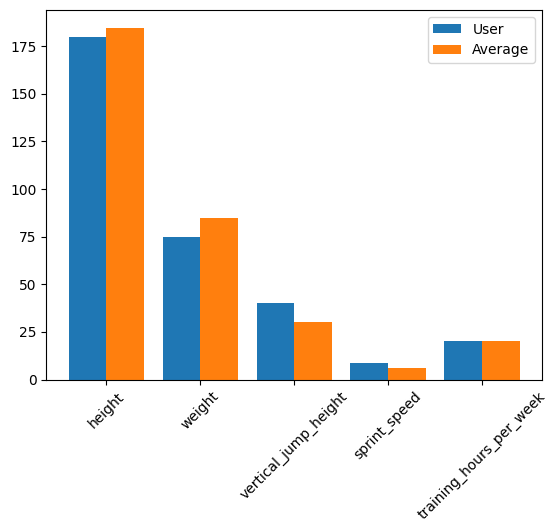

In [ ]:
import matplotlib.pyplot as plt

metrics = list(user_data.keys())
user_values = [user_data[m] for m in metrics]
avg_values = [df[m].mean() for m in metrics]

x = range(len(metrics))
plt.bar(x, user_values, width=0.4, label="User", align="center")
plt.bar([i+0.4 for i in x], avg_values, width=0.4, label="Average", align="center")
plt.xticks([i+0.2 for i in x], metrics, rotation=45)
plt.legend()
plt.show()

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

app = FastAPI()

# Load dataset
df = pd.read_csv("MOCK_DATA.csv")

# Only compute averages for numeric columns
numeric_df = df.select_dtypes(include=['number'])
averages = numeric_df.mean()

class AthleteData(BaseModel):
    height: float
    weight: float
    sprint: float
    jump: float
    hours: float

@app.post("/compare")
def compare(data: AthleteData):
    feedback = {}
    metrics = ["height","weight","sprint","jump","hours"]
    personal = [data.height, data.weight, data.sprint, data.jump, data.hours]

    # Feedback logic
    for i, m in enumerate(metrics):
        if personal[i] > averages[m]:
            feedback[m] = "Improving"
        elif personal[i] == averages[m]:
            feedback[m] = "Static"
        else:
            feedback[m] = "Needs Improvement"

    # Chart generation
    plt.figure(figsize=(6,4))
    plt.plot(metrics, personal, marker="o", label="Athlete")
    plt.plot(metrics, [averages[m] for m in metrics], marker="x", label="Average")
    plt.legend()
    plt.title("Performance Comparison")
    buf = io.BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img_b64 = base64.b64encode(buf.read()).decode("utf-8")

    return {"feedback": feedback, "chart": img_b64}

In [ ]:
!pip install fastapi uvicorn pyngrok pandas matplotlib

In [ ]:
!ngrok config add-authtoken 39HQJFpkWelKOCAGlKy1yFbfayi_6eUkeDjtofuNnAmrjesAB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://intervalic-trey-photometrically.ngrok-free.dev" -> "http://localhost:8000"
